In [13]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import matplotlib as plt
plt.rcParams['font.family'] = 'Pretendard'
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
# ! pip install scikit-learn, conda install scikit-learn

clustering이란 여러 개의 데이터가 있을 때 군집화하는 것을 의미한다.
비슷한 데이터끼리 묶어놓으면 관리하기 쉽다는 장점이 있다.

In [2]:
# clustering(군집화)에 필요한 라이브러리를 import 시킨다.
from sklearn.cluster import KMeans

clustering을 실행할 데이터를 만든다.

In [14]:
df = pd.DataFrame(columns=['x', 'y'])

df.loc[0] = [2, 3]
df.loc[1] = [2, 11]
df.loc[2] = [2, 18]
df.loc[3] = [4, 5]
df.loc[4] = [4, 7]
df.loc[5] = [5, 3]
df.loc[6] = [5, 15]
df.loc[7] = [6, 6]
df.loc[8] = [6, 8]
df.loc[9] = [6, 9]
df.loc[10] = [7, 2]
df.loc[11] = [7, 4]
df.loc[12] = [7, 5]
df.loc[13] = [7, 17]
df.loc[14] = [7, 18]
df.loc[15] = [8, 5]
df.loc[16] = [8, 4]
df.loc[17] = [9, 10]
df.loc[18] = [9, 11]
df.loc[19] = [9, 15]
df.loc[20] = [9, 19]
df.loc[21] = [10, 5]
df.loc[22] = [10, 8]
df.loc[23] = [10, 18]
df.loc[24] = [12, 6]
df.loc[25] = [13, 5]
df.loc[26] = [14, 11]
df.loc[27] = [15, 6]
df.loc[28] = [15, 18]
df.loc[29] = [18, 12]

df.head()

x   y
0  2   3
1  2  11
2  2  18
3  4   5
4  4   7

In [5]:
# index: 데이터프레임의 인덱스를 얻어온다.
print(df.index)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
           dtype='int64')


In [ ]:
# column: 데이터프레임의 컬럼 이름을 얻어온다.
print(df.columns)

In [20]:
# values: 데이터프레임에 저장된 데이터만 numpy 배열 형태로 얻어온다.
print(df.values)
point = df.values

[[2 3]
 [2 11]
 [2 18]
 [4 5]
 [4 7]
 [5 3]
 [5 15]
 [6 6]
 [6 8]
 [6 9]
 [7 2]
 [7 4]
 [7 5]
 [7 17]
 [7 18]
 [8 5]
 [8 4]
 [9 10]
 [9 11]
 [9 15]
 [9 19]
 [10 5]
 [10 8]
 [10 18]
 [12 6]
 [13 5]
 [14 11]
 [15 6]
 [15 18]
 [18 12]]


clustering을 실행할 데이터를 시각화한다.

<AxesSubplot:xlabel='x', ylabel='y'>

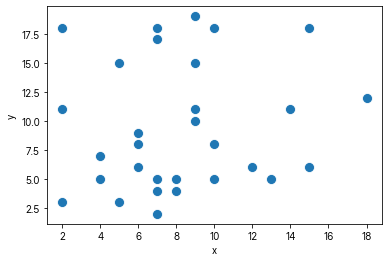

In [18]:
# plt.figure(figsize=[12, 8])
sns.scatterplot(data=df, x='x', y='y', s=100)

KMeans를 수행하기 위해서는 클러스터링을 수행할 데이터의 주제를 결정하고 얼마나 많은 클러스터를 만들지 결정한다.
이 때, 데이터가 정확할수록 유리하게 클러스터링을 할 수 있고 클러스터링을 수행하는 방법은 무작위 중심(centroid)값 선택, KMeans++법 등 다양한 방법이 있다.

- 무작위 중심(centroid) 값 선택 알고리즘을 이용한 클러스터링: 중심에 가까운 데이터를 클러스터에 포함시키고 중심을 클러스터의 중항으로 이동시키는 과정을 반복해서 수행한다. 더 이상 중심의 위치가 변하지 않을 때까지 반복하는 것이 일반적이고, 이러한 과정을 거치면 결과적으로 완벽하게 군집화된 클러스터를 얻을 수 있다.

클러스터링을 위한 무작위 중심을 결정하는 방법은 가장 먼저 특정 노드(데이터)를 선택해서 클러스터의 중심으로 설정한다.
그 후에는 선택된 노드에서 가장 먼 노드를 두 번째 클러스터의 중심으로 설정한다.
그 다음부터는 이미 선택된 중심점들로부터 가장 멀리 떨어져있는 노드가 중심이 된다.

1, 2, 3 세 개의 클러스터가 존재한다고 가정하고 하나의 데이터를 선택해서 세 개의 클러스터 중심 중에서 가장 가까운 클러스터에 속하도록 만드는 작업을 반복해서 실행한다.

대략적으로 군집화가 완료되면 완벽한 군집화를 위해 중심의 위치를 데이터의 중간으로 이동시킨다.
중심의 위치를 이동시키고 다시 모든 데이터에 대해서 어떤 클러스터에 가까운지를 하나씩 체크해서, 만약 특정 데이터가 다른 클러스터의 중심에 더 가깝다면 그 클러스터에 속하도록 설정한다.
클러슷터 중심의 위치가 더 이상 바뀌지 않으면 클러스터링이 끝난다.

KMenas 알고리즘을 이용해서 클러스터 4개를 생성한다.

In [23]:
# sklearn 라이브러리의 KMeans() 함수를 이용해 데이터프레임의 데이터를 학습시킨다.
# KMeans() 함수의 n_clusters 속성으로 군집화할 클러스터의 개수를 지정하고 
kmeans = KMeans(n_clusters=4).fit(point)
# cluster_centers_: KMeans() 함수가 계산한 클러스터의 중심 위치를 얻어온다.
print(kmeans.cluster_centers_)
# labels_: KMeans() 함수가 계산한 데이터가 속하는 각각의 클러스터를 얻어온다.
print(kmeans.labels_)

[[ 5.83333333  5.08333333]
 [ 6.375      16.375     ]
 [15.66666667 13.66666667]
 [11.14285714  7.28571429]]
[0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 3 3 1 1 3 3 1 3 3 2 3 2 2]


데이터프레임에 cluster라는 열을 추가하고 군집화된 결과를 넣어준다.

In [25]:
df['cluster'] = kmeans.labels_
df.head()

x   y  cluster
0  2   3        0
1  2  11        1
2  2  18        1
3  4   5        0
4  4   7        0

In [27]:
# 데이터프레임을 csv 파일로 저장한다.
df.to_csv('./data/save.csv')

클러스터링된 결과를 시각화한다.

In [36]:
# 군집화된 결과를 hue 속성에 지정해서 서로 다른 색상으로 구분한다.
# 색상이 잘 구분되지 않으면 palette 속성으로 색상 팔레트를 지정한다.
# 색상 팔레트 이름
# BrBG, PiYG, PRGn, PuOr, RdBu, RdGy, RdYlBu, RdYlGn, Spectral, Accent, Dark2, Paired, Pastel1, Pastel2, Set1, Set2, Set3, 
# Blues, BuGn, # BuPu, GnBu, Greens, Greys, Oranges, OrRd, PuBu, PuBuGn, PuRd, Purples, RdPu, Reds, YlGn, YlGnBu, YlOrBr, 
# YlOrRd
sns.scatterplot(data=df, x='x', y='y', s=100, hue='cluster', palette='Pastel2')

<AxesSubplot:xlabel='x', ylabel='y'>